In [1]:
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
with open(r'C:\Users\Admin\wordle-project\Wordle_solver\data.txt','r') as f:
    lg_data=list()
    for line in f.readlines():
        line = eval(line)
        lg_data.append(line)
final_data=list()
data=defaultdict(list)
for game in lg_data:
    for i in range(len(game)):
        data[game[i][1]].append(len(game)-i)
for point in data.keys():
    data[point] = sum(data[point])/len(data[point])

for k,v in data.items():
    final_data.append((k,v))
print(final_data)

[(12.54, 3.9285095320623915), (7.95, 3.0618556701030926), (2.25, 2.2222222222222223), (0.01, 1.3513513513513513), (5.55, 2.888888888888889), (1.95, 1.6666666666666667), (0.83, 1.2857142857142858), (5.22, 2.566666666666667), (2.18, 2.0), (0.33, 1.4444444444444444), (4.21, 2.6153846153846154), (1.72, 2.0), (0.29, 1.5714285714285714), (0.0, 1.0), (5.89, 2.6551724137931036), (2.95, 2.0), (6.98, 2.9420289855072466), (4.36, 2.3333333333333335), (0.99, 1.4285714285714286), (7.11, 2.9876543209876543), (3.51, 2.6363636363636362), (0.11, 1.2727272727272727), (4.61, 2.4166666666666665), (0.28, 1.125), (2.08, 2.125), (6.68, 2.0), (1.0, 1.5108695652173914), (1.56, 2.0), (5.15, 2.8125), (1.2, 1.0), (1.51, 1.8333333333333333), (0.02, 1.4324324324324325), (3.58, 2.7777777777777777), (0.06, 1.5), (1.98, 2.1052631578947367), (2.09, 1.6), (6.26, 2.9814814814814814), (1.14, 1.6363636363636365), (1.03, 1.9090909090909092), (1.59, 1.9166666666666667), (0.81, 1.4285714285714286), (2.55, 2.1875), (2.67, 2.0),

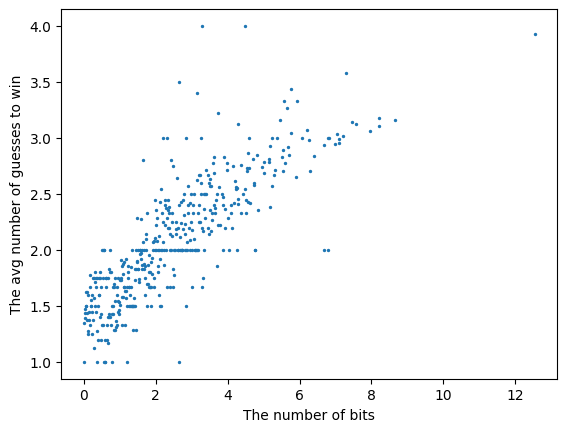

In [3]:
x=list(t[0] for t in final_data)
y=list(t[1] for t in final_data)
plt.scatter(x,y,s=2)
plt.xlabel('The number of bits')
plt.ylabel('The avg number of guesses to win')
plt.show()

In [4]:
x_train=np.array(x)
y_train=np.array(y)

In [5]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [6]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [7]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = compute_gradient(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append(compute_cost(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [8]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 1.93e+00  dj_dw: -6.122e+00, dj_db: -2.084e+00   w:  6.122e-02, b: 2.08407e-02
Iteration 1000: Cost 5.12e-02  dj_dw:  4.319e-03, dj_db: -1.623e-02   w:  2.590e-01, b: 1.41179e+00
Iteration 2000: Cost 5.08e-02  dj_dw:  1.650e-04, dj_db: -6.200e-04   w:  2.463e-01, b: 1.45953e+00
Iteration 3000: Cost 5.08e-02  dj_dw:  6.302e-06, dj_db: -2.368e-05   w:  2.458e-01, b: 1.46135e+00
Iteration 4000: Cost 5.08e-02  dj_dw:  2.407e-07, dj_db: -9.046e-07   w:  2.458e-01, b: 1.46142e+00
Iteration 5000: Cost 5.08e-02  dj_dw:  9.194e-09, dj_db: -3.455e-08   w:  2.458e-01, b: 1.46142e+00
Iteration 6000: Cost 5.08e-02  dj_dw:  3.512e-10, dj_db: -1.320e-09   w:  2.458e-01, b: 1.46142e+00
Iteration 7000: Cost 5.08e-02  dj_dw:  1.341e-11, dj_db: -5.041e-11   w:  2.458e-01, b: 1.46142e+00
Iteration 8000: Cost 5.08e-02  dj_dw:  5.120e-13, dj_db: -1.925e-12   w:  2.458e-01, b: 1.46142e+00
Iteration 9000: Cost 5.08e-02  dj_dw:  1.794e-14, dj_db: -7.461e-14   w:  2.458e-01, b: 1.46142e+00
